## preprocessing

In [1]:
import numpy as np #importing numpy and pandas 
import pandas as pd
from sklearn.datasets import load_breast_cancer #loading the dataset

In [2]:
mod_acc = {} #an variable to store the accuracy of the various models

In [3]:
can = load_breast_cancer()

In [4]:
df = pd.DataFrame(can.data,columns = can.feature_names) #converting data set into a DataFrame

In [5]:
df["Target"] = can.target #storing the target values or the values that we have to predict

In [7]:
df.head() #it shows the top 5 values of the data frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
df["istrue"]=np.random.uniform(0,1,len(df))<=0.75 #splitting the data dataframe into train and test data
train_data = df[df["istrue"]==True]
test_data = df[df["istrue"]==False]
print(len(train_data))
print(len(test_data))

433
136


In [13]:
train_data.drop("istrue",axis = 1,inplace=True)
test_data.drop("istrue",axis = 1,inplace = True)
len(train_data.columns)

31

In [14]:
xtrain = train_data.iloc[:,:30]
ytrain = train_data["Target"]

In [15]:
xtest = test_data.iloc[:,:30]
ytest = test_data["Target"]

## KNN (K nearest Neighbor)

In [17]:
from sklearn.neighbors import KNeighborsClassifier #importing the KNN classifier

In [19]:
kn = KNeighborsClassifier() # defining the Model

In [20]:
kn.fit(xtrain,ytrain) #training the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
kn.score(xtest,ytest) #testing the model

0.9264705882352942

In [22]:
mod_acc.update({"KNN":kn.score(xtest,ytest)}) #storing the result in the variable

## Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB #importing the Naive Bayes models

In [27]:
gnb = GaussianNB() #defining models
mnb = MultinomialNB()
bnb = BernoulliNB()

In [28]:
gnb.fit(xtrain,ytrain) #training models
mnb.fit(xtrain,ytrain)
bnb.fit(xtrain,ytrain)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [29]:
print(gnb.score(xtest,ytest)) #testing models 
print(mnb.score(xtest,ytest))
print(bnb.score(xtest,ytest))

0.9338235294117647
0.8823529411764706
0.6176470588235294


In [30]:
mod_acc.update({"Naive Bayes(Gaussian)":gnb.score(xtest,ytest),"Naive Bayes(Multinomial)":mnb.score(xtest,ytest),"Naive Bayes(Bernoulli)":bnb.score(xtest,ytest)})

In [31]:
mod_acc

{'KNN': 0.9264705882352942,
 'Naive Bayes(Gaussian)': 0.9338235294117647,
 'Naive Bayes(Multinomial)': 0.8823529411764706,
 'Naive Bayes(Bernoulli)': 0.6176470588235294}

## SVM (Support vector Machines)

In [32]:
from sklearn import svm

In [33]:
rbfsclas = svm.SVC(kernel = "rbf")
linsclas = svm.SVC(kernel = "linear")
sigsclas = svm.SVC(kernel = "sigmoid")

In [34]:
rbfsclas.fit(xtrain,ytrain)

c:\users\hellimax\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [35]:
linsclas.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [36]:
sigsclas.fit(xtrain,ytrain)

c:\users\hellimax\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
print(rbfsclas.score(xtest,ytest))
print(linsclas.score(xtest,ytest))
print(sigsclas.score(xtest,ytest))

0.6176470588235294
0.9485294117647058
0.6176470588235294


In [38]:
mod_acc.update({"SVM(rbf)":rbfsclas.score(xtest,ytest),"SVM(linear)":linsclas.score(xtest,ytest),"SVM(sigmoid)":sigsclas.score(xtest,ytest)})

In [39]:
mod_acc

{'KNN': 0.9264705882352942,
 'Naive Bayes(Gaussian)': 0.9338235294117647,
 'Naive Bayes(Multinomial)': 0.8823529411764706,
 'Naive Bayes(Bernoulli)': 0.6176470588235294,
 'SVM(rbf)': 0.6176470588235294,
 'SVM(linear)': 0.9485294117647058,
 'SVM(sigmoid)': 0.6176470588235294}

## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
ran = RandomForestClassifier()

In [42]:
ran.fit(xtrain,ytrain)

c:\users\hellimax\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
ran.score(xtest,ytest)

0.9632352941176471

In [44]:
mod_acc.update({"Random Forest":ran.score(xtest,ytest)})

## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dec = DecisionTreeClassifier()

In [47]:
dec.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
dec.score(xtest,ytest)

0.9338235294117647

In [49]:
mod_acc.update({"Decision Tree":dec.score(xtest,ytest)})

## Plotting

In [50]:
import matplotlib.pyplot as plt #importing matplotlib for plotting

In [51]:
name = [] #creating x and y for plotting bar graph
acc = []
for i in mod_acc:
    name.append(i)
    acc.append(mod_acc[i])

<BarContainer object of 9 artists>

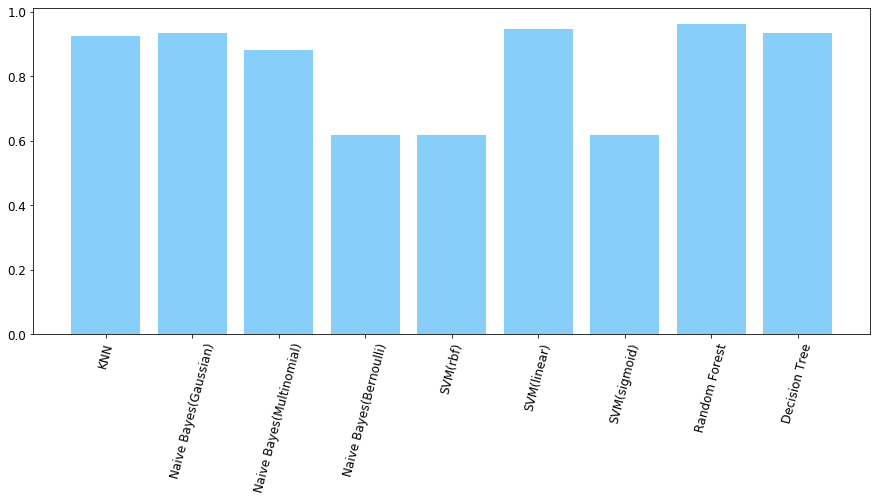

In [53]:
plt.figure(figsize=(15,6)) #plotting the bargraph of the stored results
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.xticks(rotation = 75)
plt.bar(name,acc,color = "lightskyblue")